<a href="https://colab.research.google.com/github/LarryB38/GIT-Research/blob/Test-Score-Predictions/Post_test_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
from statistics import stdev
from sklearn.metrics import r2_score 
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


##Load CSV File


In [ ]:
#load CSV
df=pd.read_csv('/content/drive/My Drive/test_scores.csv')
x_input=df.copy()
x_input.pop('student_id')

y_vals=x_input.pop('posttest')
x_input.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0


In [ ]:
strClasses=['classroom']
for i in strClasses:
  x_input.pop(i)

x_input.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0


In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

strClasses = ['school_setting']
for i in strClasses:
  enc = OneHotEncoder(handle_unknown='ignore')
  input_data = x_input[i].values.reshape(-1,1)

  #fit data
  enc.fit(input_data)
  output_array = enc.transform(input_data).toarray()
  for j in range(output_array.shape[1]):
    x_input[i+'_oneHot_'+str(j)] = output_array[:,j]

  x_input.pop(i)

x_input.head()

,school,school_type,teaching_method,n_student,gender,lunch,pretest,school_setting_oneHot_0,school_setting_oneHot_1,school_setting_oneHot_2
0,ANKYI,Non-public,Standard,20.0,Female,Does not qualify,62.0,0.0,0.0,1.0
1,ANKYI,Non-public,Standard,20.0,Female,Does not qualify,66.0,0.0,0.0,1.0
2,ANKYI,Non-public,Standard,20.0,Male,Does not qualify,64.0,0.0,0.0,1.0
3,ANKYI,Non-public,Standard,20.0,Female,Does not qualify,61.0,0.0,0.0,1.0
4,ANKYI,Non-public,Standard,20.0,Male,Does not qualify,64.0,0.0,0.0,1.0


In [ ]:
#remove all columns except one-hot for school type & pretest scores

# not school type instead using school_setting for screenshot
strClasses_remove=['school','school_type','teaching_method','n_student','gender','lunch','pretest']

for i in strClasses_remove:  #removing the extraneous columns
  x_input.pop(i)


#x_input.head()
print(x_input.loc[39:42]) #print specific rows from the dataframe

# try removing school_type_one_hot_encoder_1 --> yep, it works b/c there are only 2 distinct values

    school_setting_oneHot_0  school_setting_oneHot_1  school_setting_oneHot_2
39                      0.0                      0.0                      1.0
40                      0.0                      0.0                      1.0
41                      0.0                      1.0                      0.0
42                      0.0                      1.0                      0.0


In [ ]:
print(x_input.loc[39:39],'\n')
print(x_input.loc[41:41],'\n')
print(x_input.loc[460:460])


    school_setting_oneHot_0  school_setting_oneHot_1  school_setting_oneHot_2
39                      0.0                      0.0                      1.0 

    school_setting_oneHot_0  school_setting_oneHot_1  school_setting_oneHot_2
41                      0.0                      1.0                      0.0 

     school_setting_oneHot_0  school_setting_oneHot_1  school_setting_oneHot_2
460                      1.0                      0.0                      0.0


In [ ]:
setting=df['school_setting']
print(setting.loc[39:39],'\n')
print(setting.loc[41:41],'\n')
print(setting.loc[460:460])

39    Urban
Name: school_setting, dtype: object 

41    Suburban
Name: school_setting, dtype: object 

460    Rural
Name: school_setting, dtype: object


In [ ]:
#R^2 value for pretest AND school type

reg_2factors=LinearRegression().fit(x_input, y_vals)
print(reg_2factors.score(x_input, y_vals))


0.2102906922639166


In [ ]:
#using r2_score method

y_predictions=reg_2factors.predict(x_input)
print(r2_score(y_vals,y_predictions))

## r2_score & reg.score return same value

# this R^2 is a tiny bit (0.001) higher than the one for only pretest

0.2102906922639166


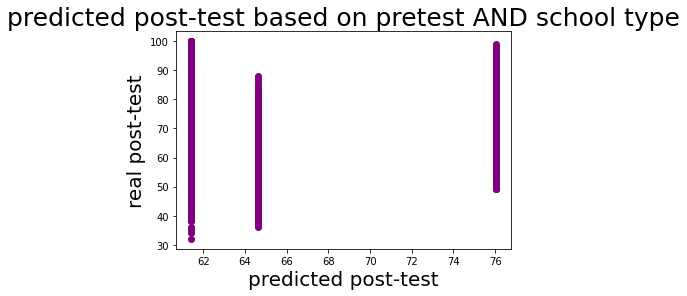

In [ ]:
#plot real post-test scores vs. predicted post-test scores
# no line of best fit

plt.scatter(y_predictions,y_vals, color='purple')
plt.title('predicted post-test based on pretest AND school type',fontsize=25)

plt.xlabel('predicted post-test',fontsize=20)  # x-axis name
plt.ylabel('real post-test',fontsize=20)  # y-axis name
plt.show()

##Predicting post-test only based on Pretest


In [ ]:
# based only off of pretest

x_pretest=np.array(df['pretest'])
x_pretest=x_pretest.reshape(-1,1)
reg_1factor=LinearRegression().fit(x_pretest,y_vals)
y_predictions_1factor=reg_1factor.predict(x_pretest)

#R^2 value (only pretest)
print(r2_score(y_vals,y_predictions_1factor))
print(reg_1factor.score(x_pretest,y_vals))

0.9041809248246263
0.9041809248246262


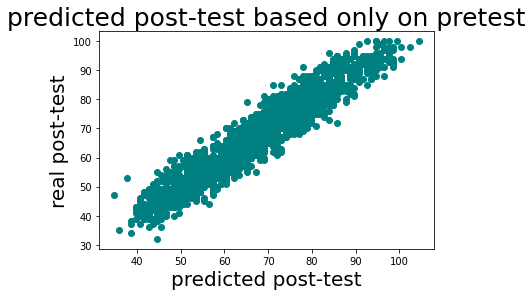

In [ ]:
#plot predictions only off pretest

plt.scatter(y_predictions_1factor,y_vals, color='teal')
plt.title('predicted post-test based only on pretest',fontsize=25) #plot title

plt.xlabel('predicted post-test',fontsize=20)  # x-axis name
plt.ylabel('real post-test',fontsize=20)  # y-axis name
#plt.annotate(("r^2 = {:.4f}".format(r2_score(y_vals, y_predictions_1factor))), (12, 90))
plt.show()

##Plot predicted post-test vs. pretests


Text(25, 100, 'r^2 = 0.210')

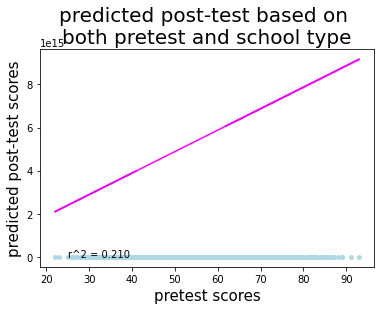

In [ ]:
#prediction on both school type and pretest
plt.plot(x_pretest, reg_2factors.coef_[0] * x_pretest + reg_2factors.intercept_, color='magenta'); # plot prediction line (mx + b)
plt.scatter(x_pretest, y_vals, s=15,color='lightblue')
plt.title('predicted post-test based on \nboth pretest and school type',fontsize=20) #plot title

plt.xlabel('pretest scores',fontsize=15)  # x-axis name
plt.ylabel('predicted post-test scores',fontsize=15)  # y-axis name
plt.annotate(("r^2 = {:.3f}".format(r2_score(y_vals, y_predictions))), (25, 100))



Text(25, 100, 'r^2 = 0.904')

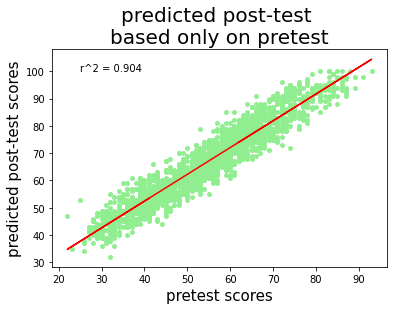

In [ ]:
#prediction based only on pretest
plt.plot(x_pretest, reg_1factor.coef_[0] * x_pretest + reg_1factor.intercept_, color='red') # plot prediction line (mx + b)
plt.scatter(x_pretest, y_vals, s=15,color='lightgreen')
plt.title('predicted post-test \nbased only on pretest',fontsize=20) #plot title

plt.xlabel('pretest scores',fontsize=15)  # x-axis name
plt.ylabel('predicted post-test scores',fontsize=15)  # y-axis name
plt.annotate(("r^2 = {:.3f}".format(r2_score(y_vals, y_predictions_1factor))), (25,100))


In [ ]:
"""
1) only load dataframe once
2) change "df"
3) dont worry about line of best fit in the plots
4) examine data before I fit model
5) cleanup notebook (delete useless cells and comments)
6) rename the models (change "reg") & improve comments
7) before the meetings go to runtime --> restart and run all
"""

'\n1) only load dataframe once\n2) change "df"\n3) dont worry about line of best fit in the plots\n4) examine data before I fit model\n5) cleanup notebook (delete useless cells and comments)\n6) rename the models (change "reg") & improve comments\n7) before the meetings go to runtime --> restart and run all\n'

## Histograms...


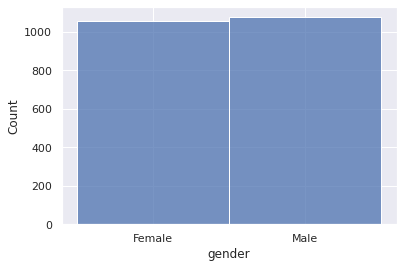

In [ ]:
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(df['gender'])

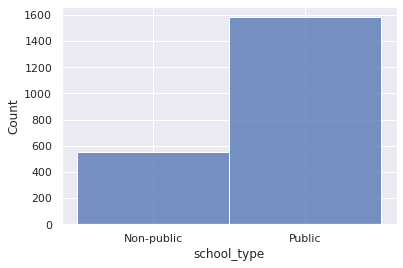

In [ ]:
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(df['school_type'])

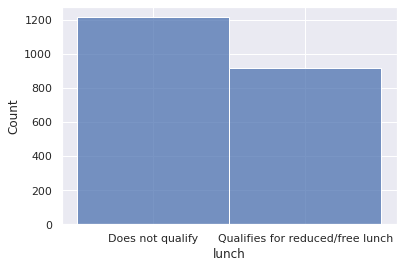

In [ ]:
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(df['lunch'])

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'pretest (blue) and posttest (green)')]

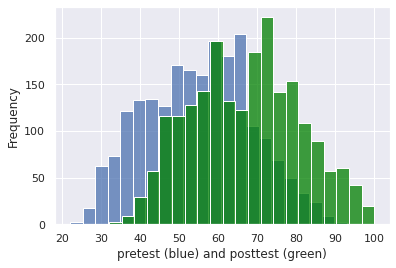

In [ ]:
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(df['pretest'])
ax = sns.histplot(df['posttest'], color='green')
ax.set(xlabel="pretest (blue) and posttest (green)", ylabel = "Frequency")

Text(12, 90, 'r^2 = 0.9042')

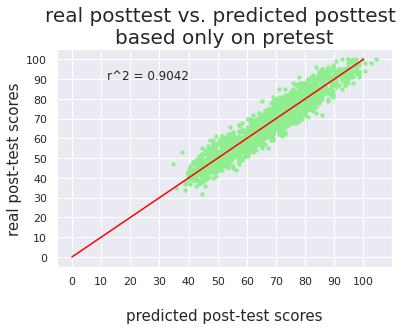

In [ ]:
#plot predictions only off pretest

plt.scatter(y_predictions_1factor,y_vals, s=11,color='lightgreen')
plt.plot([0,10,20,30,40,50,60,70,80,90,100],[0,10,20,30,40,50,60,70,80,90,100],color='red')

plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.title('real posttest vs. predicted posttest \nbased only on pretest',fontsize=20) #plot title
plt.xlabel('\npredicted post-test scores',fontsize=15)  # x-axis name
plt.ylabel('real post-test scores',fontsize=15)  # y-axis name
plt.annotate(("r^2 = {:.4f}".format(r2_score(y_vals, y_predictions_1factor))), (12, 90))




In [ ]:
pre_scores=df["pretest"]
post_scores=df['posttest']
pre_total=0
pre_count=0
post_count=0
post_total=0
for i in pre_scores:
  pre_total+=pre_scores[i]
  pre_count+=1
for i in post_scores:
  post_total+=post_scores[i]
  post_count+=1

pre_avg=pre_total/pre_count
post_avg=post_total/post_count

#print averages
print("Pretest average is: ",pre_avg)
print("Post-test average is: ",post_avg)
print("rounded pretest avg is: ",round(pre_avg,4))
print("rounded post-test avg is: ",round(post_avg,4))

Pretest average is:  63.65119549929676
Post-test average is:  80.29864041256447
rounded pretest avg is:  63.6512
rounded post-test avg is:  80.2986


In [ ]:
# mean of 1factor prediction and also 2factor prediction
from statistics import mean

print(mean(y_predictions_1factor))
print(mean(y_predictions))

67.10220346929208
67.10526547116737


TypeError: ignored

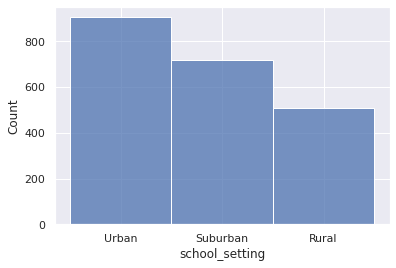

In [ ]:
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(df['school_setting'])

In [ ]:
sett=df['school_setting']
count_u=0
count_s=0
count_r=0
for i in sett:
  if i=='Urban':
    count_u+=1
  elif i=='Suburban':
    count_s+=1
  elif i=='Rural':
    count_r+=1

print("Urban: ",count_u)
print("Suburban: ",count_s)
print("Rural: ",count_r)
print(count_u+count_s+count_r)


Urban:  906
Suburban:  717
Rural:  510
2133
